# Predicting the predictions

RTE provides an API to access the predictions of the productions of the different types of energy sources.

The API is available at the following URL: https://data.rte-france.com/catalog/-/api/generation/Generation-Forecast/v2.1



In [13]:
import pandas as pd
from energy_forecast import ROOT_DIR
from energy_forecast.production_forecast import ProductionForecastAPI

sun_flux_file = ROOT_DIR / "data" / "silver" / "group_mean_sun.csv"
wind_speed_file = ROOT_DIR / "data" / "silver" / "group_means_wind.csv"

prediction_file = ROOT_DIR / "data" / "silver" / "forecasted_production_rte.csv"


## First : reading the Weather Data

This step requires the two files in the Data folder.

In [9]:
data_sun = pd.read_csv(sun_flux_file, index_col=0)
data_sun["time"] = pd.to_datetime(data_sun["time"])
data_sun["step"] = pd.to_timedelta(data_sun["step"])
data_sun["valid_time"] = (
    data_sun["time"] + data_sun["step"]
)  # re-forcing the type to datetime

mask_D1 = (data_sun["step"] >= pd.Timedelta("1D")) & (
    data_sun["step"] < pd.Timedelta("2D")
)
data_sunD1 = data_sun.loc[mask_D1]
data_sunD1_regions = data_sunD1.set_index("valid_time").pivot_table(
    index="valid_time", columns="region", values="ssrd"
)
data_sunD1_regions.index = data_sunD1_regions.index.tz_localize("UTC").tz_convert(
    "Europe/Paris"
)
data_sunD1_regions.head()

region,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Corse,Grand Est,Hauts-de-France,Normandie,Nouvelle-Aquitaine,Occitanie,Pays de la Loire,Provence-Alpes-Côte d'Azur,Île-de-France
valid_time,,,,,,,,,,,,,
2022-02-02 01:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-02 02:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-02 03:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-02 04:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-02 05:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
data_wind = pd.read_csv(wind_speed_file, index_col=False)
data_wind["time"] = pd.to_datetime(data_wind["time"])
data_wind["step"] = pd.to_timedelta(data_wind["step"])
data_wind["valid_time"] = (
    data_wind["time"] + data_wind["step"]
)  # re-forcing the type to datetime

mask_D1 = (data_wind["step"] >= pd.Timedelta("1D")) & (
    data_wind["step"] < pd.Timedelta("2D")
)
data_windD1 = data_wind.loc[mask_D1]
data_windD1_regions = data_windD1.set_index("valid_time").pivot_table(
    index="valid_time", columns="region", values="si10"
)
data_windD1_regions.index = data_windD1_regions.index.tz_localize("UTC").tz_convert(
    "Europe/Paris"
)

data_windD1_regions.head()

region,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Corse,Grand Est,Hauts-de-France,Normandie,Nouvelle-Aquitaine,Occitanie,Pays de la Loire,Provence-Alpes-Côte d'Azur,Île-de-France
valid_time,,,,,,,,,,,,,
2022-02-02 01:00:00+01:00,3.705175,4.568276,3.618184,5.089186,2.738070,5.581255,7.098129,6.486237,3.067982,5.653931,4.084127,6.189727,5.536256
2022-02-02 02:00:00+01:00,3.642379,4.467238,3.637520,4.925655,3.236441,5.360667,6.929116,6.696957,2.970035,5.337131,4.211257,6.436513,5.553952
2022-02-02 03:00:00+01:00,3.565388,4.325107,3.703880,4.928397,3.292210,5.261508,6.651305,6.627742,2.861727,5.112169,4.206979,6.645758,5.340007
2022-02-02 04:00:00+01:00,3.477547,4.289974,3.734176,4.882295,2.995472,5.266212,6.441283,6.488635,2.668218,5.075777,4.100137,6.682411,5.293652
2022-02-02 05:00:00+01:00,3.476616,4.251610,3.752356,4.757608,2.792265,5.068052,6.376684,6.372849,2.510890,5.077017,3.887392,6.527510,5.267478


<Axes: >

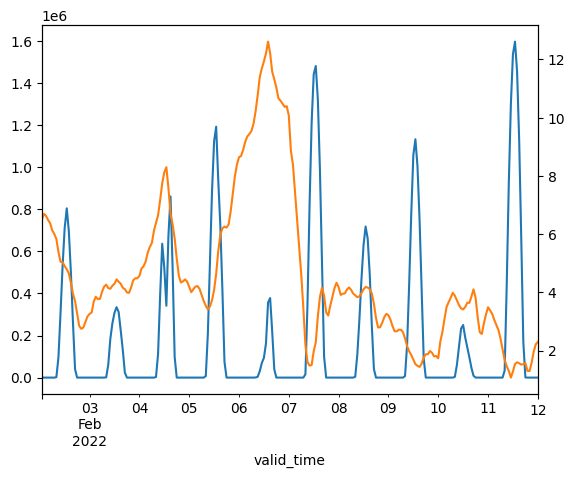

In [11]:
data_sunD1_regions["Normandie"].iloc[0:240].plot()

data_windD1_regions["Normandie"].iloc[0:240].plot(secondary_y=True)

## Second: Accessing the prediction of the production

RTE provides the prevision at D+1 of the production of the different types of energy sources.

In [50]:
forecaste_prediction = pd.read_csv(prediction_file, index_col=0)
forecaste_prediction.index = pd.to_datetime(forecaste_prediction.index, utc=True).tz_convert("Europe/Paris")
prediction_solar = forecaste_prediction["SOLAR_FORECAST_D1"].dropna()
prediction_eolien = forecaste_prediction['EOLIEN_FORECAST_D1'].dropna()

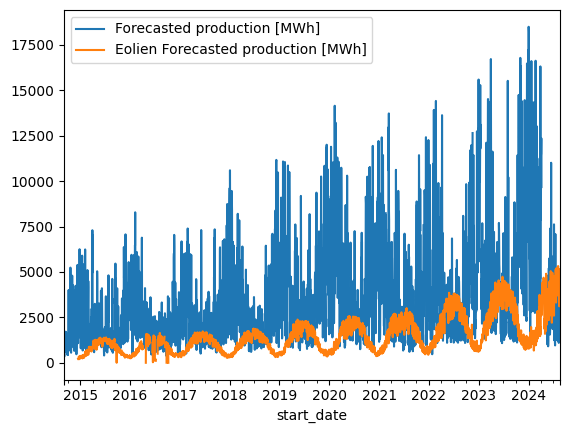

In [51]:
ax = prediction_eolien.resample("1D").mean().plot(label="Forecasted production [MWh]")
prediction_solar.resample("1D").mean().plot(label="Eolien Forecasted production [MWh]", ax=ax)
ax.legend()

# modeling

In [52]:
from sklearn.linear_model import LinearRegression

## prediction of the solar production

In [54]:
first_date = prediction_solar.index[0]
first_date = pd.Timestamp("2022-10-01", tz=first_date.tz)  # the data is strange before this date
last_date = prediction_solar.index[-1]
X_sun = data_sunD1_regions.loc[first_date:last_date]
X_sun, Y_sun = X_sun.align(prediction_solar, axis=0, join="inner")
print(X_sun.shape, Y_sun.shape)

(12642, 13) (12642,)


In [55]:
model_sun = LinearRegression(positive=True, fit_intercept=False)
model_sun.fit(X_sun, Y_sun)

LinearRegression(fit_intercept=False, positive=True)

In [56]:
Ypred = model_sun.predict(X_sun)

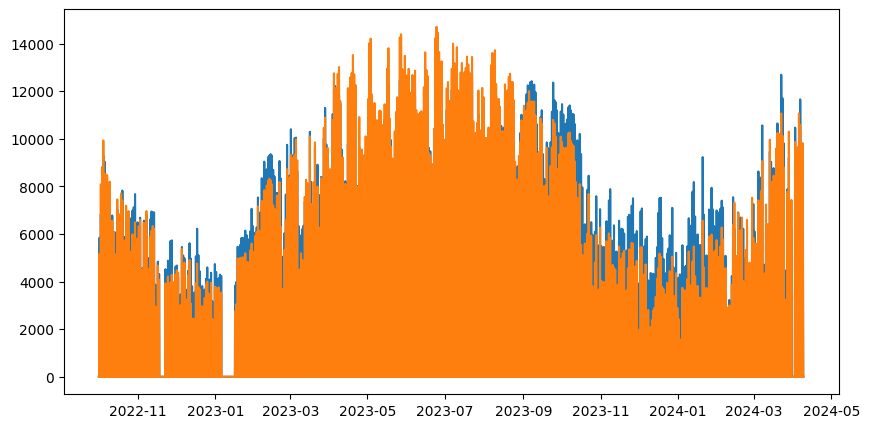

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(Y_sun)
ax.plot(Y_sun.index, Ypred)

Text(0.5, 1.0, 'Residuals of the solar production forecast')

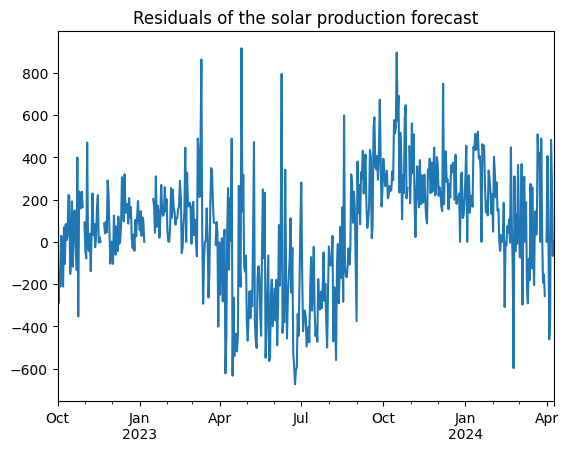

In [58]:
res = Y_sun - Ypred
ax = res.resample("1D").mean().plot(legend=False)
ax.set_title("Residuals of the solar production forecast")


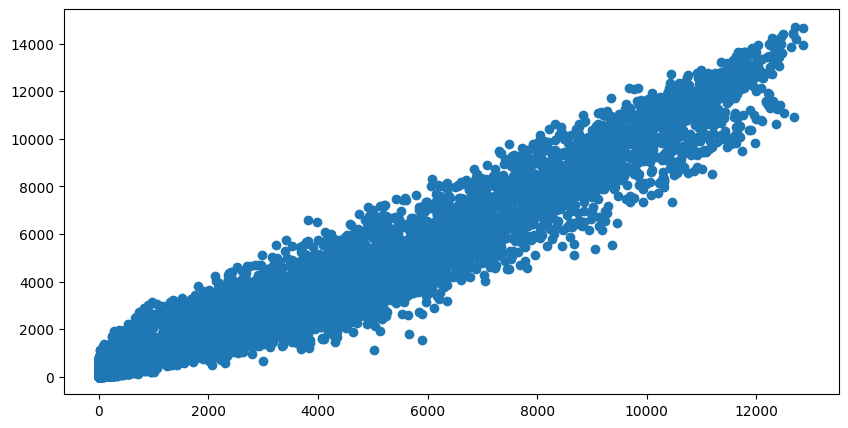

In [59]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(Y_sun, Ypred)

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(Y_sun, Ypred), r2_score(Y_sun, Ypred)

(478660.68349036836, 0.9569886460714814)

## Prediction of the Eolien production

In [61]:
import numpy as np

In [62]:
first_date = prediction_eolien.index[0]
last_date = prediction_eolien.index[-1]
X_wind = data_windD1_regions.loc[first_date:last_date]

X_wind, Y_wind = X_wind.align(prediction_eolien, axis=0, join="inner")
# X_wind = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_wind)

X_squared = X_wind ** 2
X_squared.columns = [f"{col}_squared" for col in X_squared.columns]
X_cubed = X_wind ** 3
X_cubed.columns = [f"{col}_cubed" for col in X_cubed.columns]
days_from_start = pd.DataFrame(data= (X_wind.index - X_wind.index[0]).days,
                                 index=X_wind.index, columns=["days_from_start"])

X_wind = pd.concat([X_wind, X_squared, X_cubed, days_from_start], axis=1)
# X_wind_concat = np.concatenate([X_wind, X_squared, X_cubed], axis=1)


print(X_wind.shape, Y_wind.shape)

(18142, 40) (18142,)


In [63]:
X_wind

,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Corse,Grand Est,Hauts-de-France,Normandie,Nouvelle-Aquitaine,Occitanie,...,Corse_cubed,Grand Est_cubed,Hauts-de-France_cubed,Normandie_cubed,Nouvelle-Aquitaine_cubed,Occitanie_cubed,Pays de la Loire_cubed,Provence-Alpes-Côte d'Azur_cubed,Île-de-France_cubed,days_from_start
2022-02-02 01:00:00+01:00,3.705175,4.568276,3.618184,5.089186,2.738070,5.581255,7.098129,6.486237,3.067982,5.653931,...,20.527390,173.858404,357.628123,272.884231,28.877408,180.738820,68.123640,237.145279,169.686969,0
2022-02-02 02:00:00+01:00,3.642379,4.467238,3.637520,4.925655,3.236441,5.360667,6.929116,6.696957,2.970035,5.337131,...,33.900277,154.048134,332.685211,300.353385,26.198994,152.028045,74.685319,266.656364,171.319330,0
2022-02-02 03:00:00+01:00,3.565388,4.325107,3.703880,4.928397,3.292210,5.261508,6.651305,6.627742,2.861727,5.112169,...,35.683101,145.656822,294.252750,291.136624,23.436048,133.602815,74.457943,293.517208,152.273928,0
2022-02-02 04:00:00+01:00,3.477547,4.289974,3.734176,4.882295,2.995472,5.266212,6.441283,6.488635,2.668218,5.075777,...,26.877939,146.047799,267.249610,273.187003,18.996079,130.769842,68.927909,298.400502,148.342695,0
2022-02-02 05:00:00+01:00,3.476616,4.251610,3.752356,4.757608,2.792265,5.068052,6.376684,6.372849,2.510890,5.077017,...,21.770580,130.173681,259.289355,258.821819,15.830082,130.865706,58.745568,278.126633,146.153112,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-05 19:00:00+02:00,4.752032,3.828821,6.059946,2.924118,1.249885,3.890892,5.609954,5.533570,4.437120,5.977187,...,1.952586,58.904372,176.554176,169.440137,87.358169,213.545520,100.599480,16.860890,65.882824,793
2024-04-05 20:00:00+02:00,4.814236,3.939903,6.376650,2.666153,0.983999,3.372354,5.474489,5.088027,4.406393,5.889512,...,0.952761,38.352998,164.070599,131.718938,85.555845,204.285684,77.419146,10.704880,27.493707,793
2024-04-05 21:00:00+02:00,4.918157,4.112790,6.464555,2.661441,1.250540,3.037739,5.279733,5.084156,4.615182,5.855557,...,1.955658,28.031819,147.175623,131.418498,98.302938,200.772732,70.518504,7.516325,18.545367,793
2024-04-05 22:00:00+02:00,5.035066,4.417569,6.305793,2.986242,1.641576,2.832180,5.036983,5.553880,5.143269,5.922671,...,4.423673,22.717594,127.794330,171.312639,136.056046,207.755642,72.540179,7.559440,22.124782,793


In [64]:
model_wind = LinearRegression(positive=True, fit_intercept=False)

model_wind.fit(X_wind, Y_wind)

LinearRegression(fit_intercept=False, positive=True)

In [65]:
Y_windpred = model_wind.predict(X_wind)

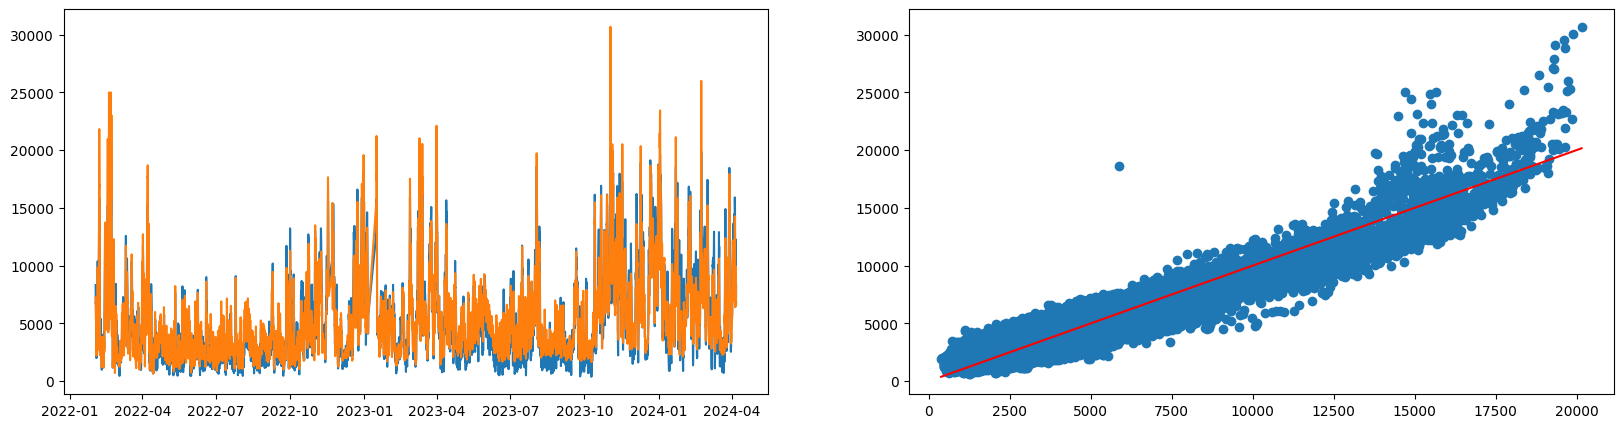

In [66]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20, 5))
ax1.plot(Y_wind)
ax1.plot(Y_wind.index, Y_windpred)
ax2.scatter(Y_wind, Y_windpred)
xs = np.linspace(Y_wind.min(), Y_wind.max(), 100)
ax2.plot(xs, xs, color="red")

Text(0.5, 1.0, 'Residuals of the wind production forecast')

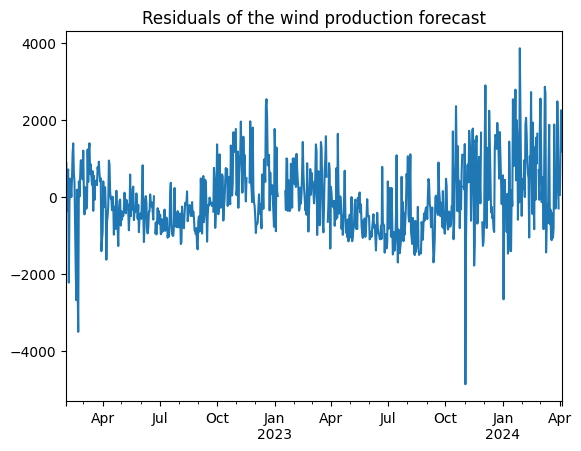

In [67]:
res = Y_wind - Y_windpred
ax = res.resample("1D").mean().plot(legend=False)
ax.set_title("Residuals of the wind production forecast")


In [68]:
print(mean_squared_error(Y_wind, Y_windpred), r2_score(Y_wind, Y_windpred))

1535947.0090418116 0.8947786803658636


# Using a Combination of the two models 
The next section uses a custom Class to model both the solar and the Eolien production.

This is a simple wrapper around the two models.

In [70]:
from energy_forecast.enr_production_model import ENRProductionModel

my_model = ENRProductionModel()

start_date = pd.Timestamp("2022-10-01", tz="Europe/Paris")
last_date = pd.Timestamp("2024-04-06", tz="Europe/Paris")
X_sun = data_sunD1_regions.loc[start_date:last_date]
X_wind = data_windD1_regions.loc[start_date:last_date]
Y_sun = prediction_solar.loc[start_date:last_date]
Y_wind = prediction_eolien.loc[start_date:last_date]

X_wind, Y_wind = X_wind.align(Y_wind, axis=0, join="inner")
X_sun, Y_sun = X_sun.align(Y_sun, axis=0, join="inner")

Y_both = pd.DataFrame(data={"sun": Y_sun, "wind": Y_wind}).dropna()
X_wind = X_wind.loc[Y_both.index]
X_sun = X_sun.loc[Y_both.index]

my_model.fit(X_sun, X_wind, Y_both)

In [71]:
results = my_model.predict(X_sun, X_wind)
results.index = X_wind.index

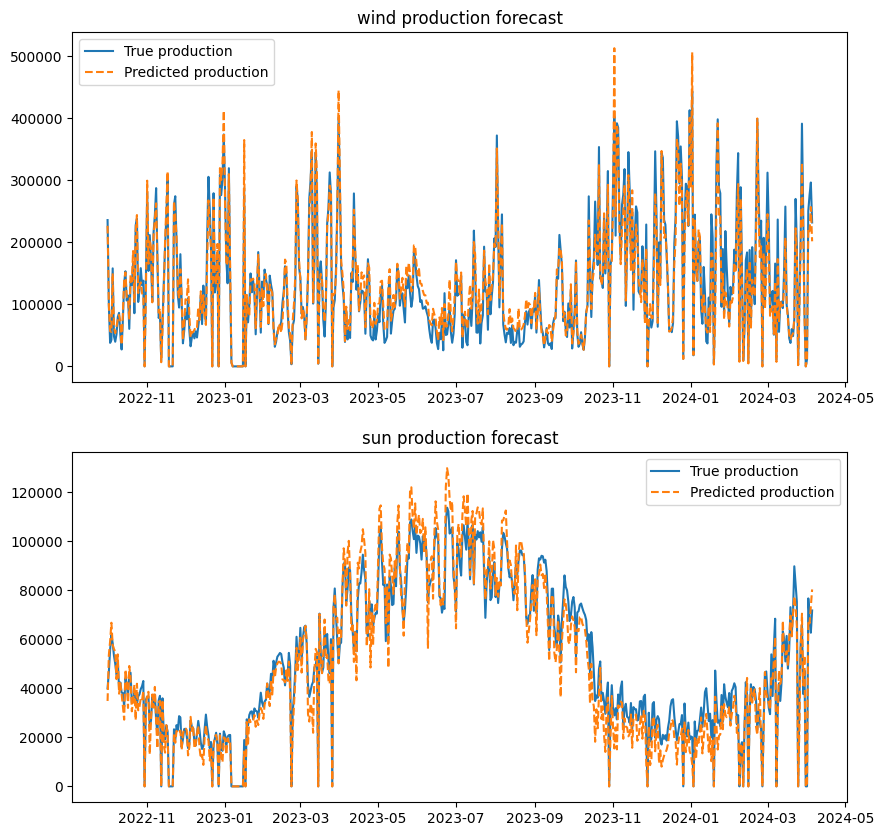

In [72]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(10, 10))

for ax, (col, Y) in zip([ax1, ax2], results.items()):
    ax.plot(Y_both[col].resample("1D").sum(), label="True production")
    ax.plot(Y.resample("1D").sum(), ls="--", label="Predicted production")
    ax.set_title(f"{col} production forecast")
    ax.legend()


In [73]:
# saving the model
my_model.save()

## Re-loading the trained model

The model is loaded from the file `model.pkl` in the Data folder.

In [74]:
my_model2 = ENRProductionModel.load()

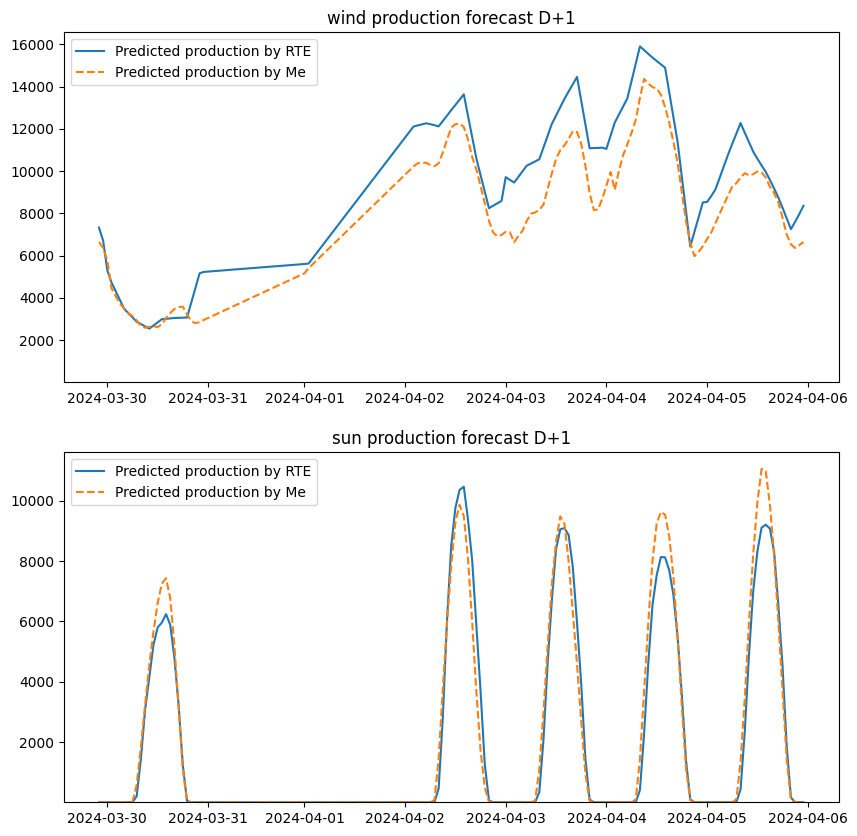

In [82]:
n_days = 7
end_date = Y_both.index[-1]
start_date = end_date - pd.Timedelta(f"{n_days}D")
X_sun = data_sunD1_regions.loc[start_date:end_date]
X_wind = data_windD1_regions.loc[start_date:end_date]
Y_sun = prediction_solar.loc[start_date:end_date]
Y_wind = prediction_eolien.loc[start_date:end_date]

X_wind, Y_wind = X_wind.align(Y_wind, axis=0, join="inner")
X_sun, Y_sun = X_sun.align(Y_sun, axis=0, join="inner")

Y_both = pd.DataFrame(data={"sun": Y_sun, "wind": Y_wind}).dropna()
X_wind = X_wind.loc[Y_both.index]
X_sun = X_sun.loc[Y_both.index]

results = my_model2.predict(X_sun, X_wind)

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(10, 10))
results.index = X_wind.index
for ax, (col, Y) in zip([ax1, ax2], results.items()):
    ax.plot(Y_both[col], label="Predicted production by RTE")
    ax.plot(Y, ls="--", label="Predicted production by Me")
    ax.set_title(f"{col} production forecast D+1")
    ax.legend()
    ax.set_ylim(ymin=1)

# Conclusion

We can see that, using the historical weather data, we can predict the prediction of the production of the different solar energy source.



## TODO
- [x] the same for wind energy
- [x] Run on longer periods
- [x] observe the evolution with time
- [ ] use finer granularity for the weather data : to do this : use the files `data/silver/weather_forecasts/*_d1.nc`

